## Домашнее задание по теме: "Проблема качества данных"

Описание задания:

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

### 1. Получите и загрузите данные

In [ ]:
# для загрузки csv на google colab
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd

df = pd.read_csv('./train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# удаляем категориальные переменные
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(df.head(5))
print(df.shape)

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500
(891, 7)


In [ ]:
# удаляем строки с пропущенными значениями
df = df.dropna()
print(df.shape)

(714, 7)


In [ ]:
# обучаем модель логистической регрессии и получаем метрику accuracy score 
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(df.drop(['Survived'], axis=1), df['Survived'])
clf.score(df.drop(['Survived'], axis=1), df['Survived'])

0.7086834733893558

### 3. Снова загрузите полные данные.

In [ ]:
df = pd.read_csv('./train.csv')

### 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [ ]:
# удаляем PassengerId, т.к. это просто id строки в таблице
# удаляем Name, т.к. имя на выживаемость повлиять не может
# удаляем Ticket, т.к. номер билета нам так же не интересен и повлиять не
# может (а вот его стоимость, класс и номер каюты может)
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### 5. Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# процент потерянных данных при удалении строк, в которых есть пропуски
df.isna().any(axis=1).sum() /  df.shape[0] * 100

79.46127946127946

In [ ]:
# признак номера кабины удаляю, т.к. в ~2/3 строк данных нет, генерация/подстановка в данном случае (на мой взляд) испорит модель
df = df.drop(['Cabin'], axis=1)

In [ ]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [ ]:
# для заполнения Embarked (откуда пассажир начал путешествие) используем моду
df['Embarked'] = df['Embarked'].fillna('S')

In [ ]:
# для заполнения возраста используем среднее арифметическое
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 6. Категориальные переменные переведите в цифровые значения. Можно использовать `pd.get_dummies`, `preprocessing.LabelEncoder`. Старайтесь не использовать для этой задачи циклы.

In [ ]:
# для пола используем бинарное кодирование
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
# для embarked используем get_dummies
df = pd.get_dummies(df, columns=['Embarked'])

In [ ]:
# проверяем
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### 7. Проверьте данные на наличие выбросов.

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

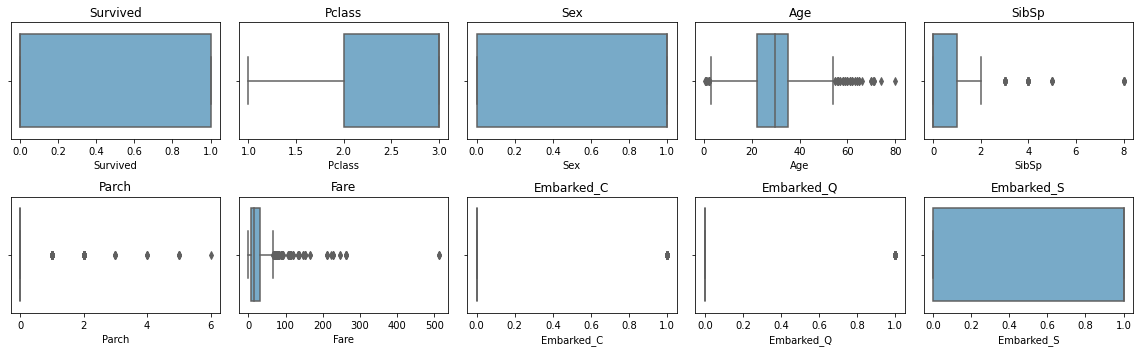

In [ ]:
# ищем выбросы
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# boxplot по всем признакам из датасета
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16, 5))

for i, ax in enumerate(axs.flat):
    sns.boxplot(x=df.iloc[:, i], ax=ax, palette='Blues')
    ax.set_title(df.columns[i])
#     ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [ ]:
df[df['Fare'] > 400]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
258,1,1,0,35.0,0,0,512.3292,1,0,0
679,1,1,1,36.0,0,1,512.3292,1,0,0
737,1,1,1,35.0,0,0,512.3292,1,0,0


Считаю нецелесообразным удалять данные выбросы, т.к. это 'легитимная' часть данных. 

### 8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

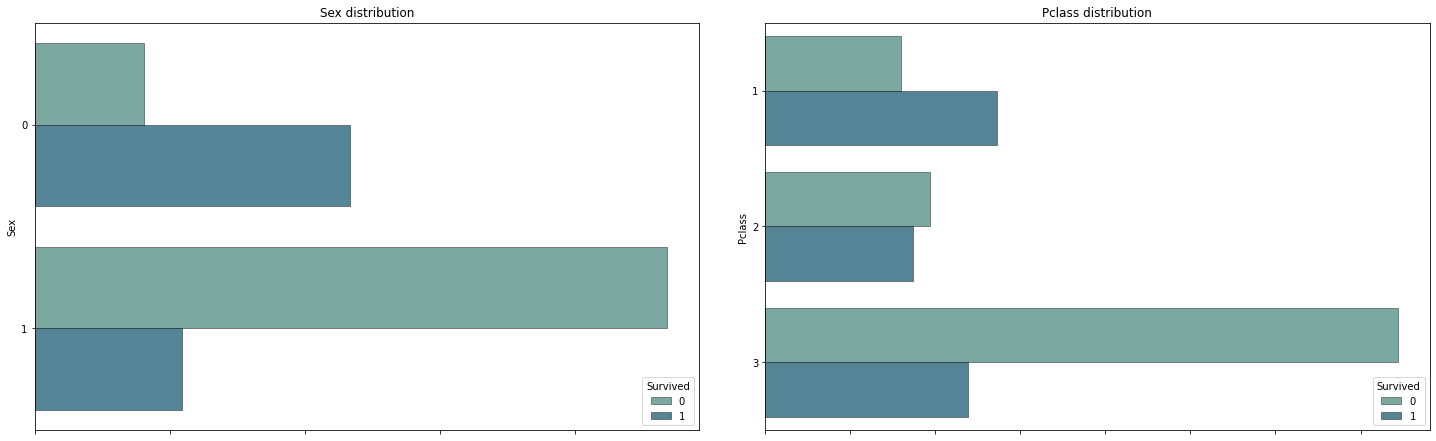

In [ ]:
# строим графики по полу (0 - female, 1 - male) и классу + уровень выживаемостти в зависимости от значений признака
selectedColumns = df[['Sex', 'Pclass']]
fg, ax = plt.subplots(1, 2, figsize = (25, 7.5))

for num, col in enumerate(selectedColumns):
    sns.countplot(data = df, y = col, ax = ax[num], hue = df['Survived'],
                    palette = 'crest', alpha = 0.8, edgecolor = 'black',
                    linewidth = 0.5).set(xticklabels = [], xlabel = None)

    sns.move_legend(ax[num], "lower right")
    ax[num].set_title(f'{col} distribution')


plt.subplots_adjust(wspace = 0.1, hspace = 0.35)
plt.show()

### 9. *Попробуйте математически преобразовать признак Age.

In [ ]:
# для преобразования использую масштабирование
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [ ]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.592481,1,0,7.2500,0,0,1
1,1,1,0,0.638789,1,0,71.2833,1,0,0
2,1,3,0,-0.284663,0,0,7.9250,0,0,1
3,1,1,0,0.407926,1,0,53.1000,0,0,1
4,0,3,1,0.407926,0,0,8.0500,0,0,1


### 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(df.drop(['Survived'], axis=1), df['Survived'])
clf.score(df.drop(['Survived'], axis=1), df['Survived'])

0.8024691358024691

### 11. Сформулируйте выводы по проделанной работе.

a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

В процессе выполнения задания были: 
1. удалены признаки, от которых не зависит целевое значение, либо признаки, для которых недостаточно данных
2. использованно биннарное и dummy кодирования дял преобразования строковых значений
3. для остуствующих значений подставлено среднее арифметическое/мода в зависимости от типа признака
4. выполнено масштабирование данных

В следствии данных преобразований была значительно улучшена модель:

| Тип данных | Accuracy Score |
| - | - |
| чистые | 0.7087 |
| подготовленные | 0.8025 |

Считаю не только целесообразным, а необходимым подготовку данных при построении моделей, т.к. это существенно улучшает показатели модели. Большие данные не исключение. 